In [11]:
DATA_PATH = "./data/"
OUTPUT_PATH = "./out/"
OUTPUT_PATH_F = "./figures/"

In [5]:
%matplotlib inline

import os
import ast
import math
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

colorDic = {"blue" : "#6599FF", "yellow" : "#FFAD33",  "purple": "#683b96", "green" : "#198D6D", "red" : "#FF523F"}
colors = list(colorDic.values())

In [7]:
lst = []
for filename in os.listdir(DATA_PATH):
    if filename.endswith(".csv") and not(filename.endswith("_conditions.csv")) and  not(filename.endswith("_conditions_apple.csv")) and filename.startswith("S"): 
        #print(filename)
        i = filename.split("_")[1].split(".")[0]
        split = filename.split("bone")[0].split("click")[0].split("raw")[0]
        x = split.split("S")[1].split("U")
        x.append(i)
        lst.append(x)
    else:
        continue
dfData = pd.DataFrame(lst, columns=["S", "U", "I"]).drop_duplicates()
for c in dfData.columns:
    dfData[c] = pd.to_numeric(dfData[c])
dfData.sort_values(["S", "U"], ascending=False)

,S,U,I
2,12,24,0
25,12,23,0
34,11,22,0
0,11,21,0
9,10,20,0
29,10,19,0
1,9,18,0
11,9,17,0
8,8,16,0
3,8,15,0


In [8]:
def readBoneData (pS, pId, i):
    file = "%sS%iU%iboneData_%i.csv" % (DATA_PATH, pS, pId, i)
    print(file)
    with open(file, 'r') as f:
        first_line = f.readline()
    startTime = (int)(first_line.split(" ")[-1].replace("\n", ""))
    print("Start Time: %i" %startTime)
    df = pd.read_csv(file, skiprows=1, sep=";")
    df.rename(columns={'PlayerSelect': 'IsPointer', 'UId': 'PId'}, inplace=True)
    x = len(df)
    if df.PId.dtype is np.array([object()]).dtype:
        df = df[(df.PId != "PId") & ( df.PId != "UId")]
        if (len(df) != x):
            print("Dropped %i header lines in file" % (x-len(df)))
    df = df[df['Timestamp'].isna() == False]
    for c in df.columns[:2]:
        df[c] = pd.to_numeric(df[c])
    for c in df.columns[3:-1]:
        if (isinstance(df[c].iloc[0], str)):
            df[c] = df[c].apply(lambda x: ast.literal_eval(x))
    df["StartTimeUnix"] = startTime
    df.columns = df.columns.str.replace("_", "")
    df.rename(columns={'Timestamp': 'TimeUnix'}, inplace=True)
    df["Time"] = pd.to_datetime(df.TimeUnix, unit='ms')
    
    df["SessionId"] = pS
    df["File"] = file
    print("Length: %i" % len(df))
    return df

In [10]:
%%time
file = "%sdata_bone_v01.pkl" % OUTPUT_PATH
if os.path.isfile(file):
    print("Reading Existing bone file")
    dfBone = pd.read_pickle(file)
else: 
    dfsBones = dfData.apply(lambda e: readBoneData(e.S, e.U, e.I), axis=1)
    dfBone = pd.concat(dfsBones.to_list(), sort=True)
    dfBone = dfBone.reset_index(drop= True)

    d = {'True': True, 'False': False}
    dfBone["IsPointer"]= dfBone.IsPointer.astype(str).map(d)
    dfBone["Correction"]= dfBone.Correction.astype(str).map(d)
    dfBone.to_pickle(file)

./data/S11U21boneData_0.csv
Start Time: 1533654509649


/usr/local/lib/python3.6/dist-packages/pandas/core/apply.py:186: DtypeWarning: Columns (0,1,2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  return self.apply_standard()


Dropped 12 header lines in file
Length: 233830
./data/S11U21boneData_0.csv
Start Time: 1533654509649


/usr/local/lib/python3.6/dist-packages/pandas/core/apply.py:292: DtypeWarning: Columns (0,1,2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  self.apply_series_generator()


Dropped 12 header lines in file
Length: 233830
./data/S9U18boneData_0.csv
Start Time: 1533627240515


/usr/local/lib/python3.6/dist-packages/pandas/core/apply.py:292: DtypeWarning: Columns (0,1,2,11) have mixed types. Specify dtype option on import or set low_memory=False.
  self.apply_series_generator()


Dropped 12 header lines in file
Length: 161720
./data/S12U24boneData_0.csv
Start Time: 1533716801983
Dropped 12 header lines in file
Length: 130422
./data/S8U15boneData_0.csv
Start Time: 1533563565916
Dropped 12 header lines in file
Length: 336752
./data/S5U10boneData_0.csv
Start Time: 1533200908413
Dropped 12 header lines in file
Length: 142682
./data/S4U7boneData_0.csv
Start Time: 1533112123193
Dropped 12 header lines in file
Length: 208066
./data/S4U8boneData_0.csv
Start Time: 1533112123414
Dropped 12 header lines in file
Length: 114145
./data/S8U16boneData_0.csv
Start Time: 1533563566109
Dropped 12 header lines in file
Length: 191408
./data/S10U20boneData_0.csv
Start Time: 1533642123627
Dropped 12 header lines in file
Length: 169169
./data/S6U12boneData_0.csv
Start Time: 1533218822312
Dropped 12 header lines in file
Length: 144544
./data/S9U17boneData_0.csv
Start Time: 1533627240296
Dropped 12 header lines in file
Length: 241372
./data/S6U11boneData_0.csv
Start Time: 1533218822109


In [18]:
dfBone.groupby(["PId", "IsPointer"]).count()

,,Correction,File,FingertipForward,FingertipPos,FingertipRot,HMDForward,HMDPos,HMDRot,IntersectionEFRC,IntersectionFRC,...,IntersectionIFRC,IntersectionStick,PointerstickForward,PointerstickPos,PointerstickRot,PosCylinderObserver,SessionId,StartTimeUnix,Time,TimeUnix
PId,IsPointer,,,,,,,,,,,,,,,,,,,,,
1,True,0,257417,257417,257417,257417,257417,257417,257417,257417,257417,...,257417,0,0,0,0,257417,257417,257417,257417,257417
2,False,150647,150647,0,0,0,150647,150647,150647,0,0,...,0,150647,150647,150647,150647,150647,150647,150647,150647,150647
3,True,0,203950,203950,203950,203950,203950,203950,203950,203950,203950,...,203950,0,0,0,0,203950,203950,203950,203950,203950
4,False,124796,124796,0,0,0,124796,124796,124796,0,0,...,0,124796,124796,124796,124796,124796,124796,124796,124796,124796
5,True,0,295827,295827,295827,295827,295827,295827,295827,295827,295827,...,295827,0,0,0,0,295827,295827,295827,295827,295827
6,False,175157,175157,0,0,0,175157,175157,175157,0,0,...,0,175157,175157,175157,175157,175157,175157,175157,175157,175157
7,True,0,208066,208066,208066,208066,208066,208066,208066,208066,208066,...,208066,0,0,0,0,208066,208066,208066,208066,208066
8,False,114145,114145,0,0,0,114145,114145,114145,0,0,...,0,114145,114145,114145,114145,114145,114145,114145,114145,114145
9,True,0,243365,243365,243365,243365,243365,243365,243365,243365,243365,...,243365,0,0,0,0,243365,243365,243365,243365,243365


In [19]:
def readConditionData(pS):
    file = "%sS%i_conditions.csv" % (DATA_PATH, pS)
    print(file)
    df = pd.read_csv(file, skiprows=3, sep=";")
    df = df[~df.Correction.isna()]
    df = df[df.Id != "Id"]

    for c in df.columns:
        if (isinstance(df[c].iloc[0], str)):
            df[c] = df[c].apply(lambda x: ast.literal_eval(x))
        
    df['ObserverDistance'] = df.PositonOfObserver.apply(lambda x: x[0])
    
    return df

def readClickData (pS, pId, i):
    file = "%sS%iU%iclickData_%i.csv" % (DATA_PATH, pS, pId, i)
    print(file)
    with open(file, 'r') as f:
        first_line = f.readline()
    startTime = (int)(first_line.split(" ")[-1].replace("\n", ""))
    print("Start Time: %i" %startTime)
    df = pd.read_csv(file, skiprows=1, sep=";")
    for c in ['Position', 'PositonOfObserver']:
        df[c] = df[c].apply(lambda x: ast.literal_eval(x))
    df["StartTimeUnix"] = startTime
    df.rename(columns={'Timestamp': 'TimeUnix', 'Id': 'PId', 'PlayerSelect': 'IsPointer'}, inplace=True)
    
    df["Time"] = pd.to_datetime(df.TimeUnix, unit='ms')
    df["SessionId"] = pS
    df["File"] = file
    
    #df2 = readConditionData(pS)
    #df["ObserverDistance"] = df2.ObserverDistance
    
    df['ObserverDistance'] = df.PositonOfObserver.apply(lambda x: x[0])
    return df

In [28]:
%%time
dfs = dfData.apply(lambda e: readClickData(e.S, e.U, e.I), axis=1)
dfClick = pd.concat(dfs.to_list())

### THIS IGNORES THE APPLE SCENE FOR NOW ###
dfClick = dfClick[dfClick.Scene == 'Cylinder']

dfClick["TargetId"] = -1
i = 0
#for e in sorted(dfClick.TargetPos.unique()):
for e in sorted(dfClick.Position.unique()):
    if (len(dfClick[dfClick.Position == e] != 0)):
        dfClick.loc[dfClick.Position == e, "TargetId"] = i
        i = i+1

if len(dfClick.TargetId.unique()) > 80:
    print("")
    print("Error: to Many Targets")
    
dfClick = dfClick.reset_index(drop= True)

#dfClick["TargetAngle"] = dfClick.TargetPos.apply(lambda x: math.degrees(math.atan2(x[0],x[2])))
#dfClick["TargetProjectionX"]  = (dfClick.TargetAngle / 180.0) * np.pi * 4.0
#dfClick["TargetProjectionY"]  = dfClick.TargetPos.apply(lambda x: x[1])
dfClick["TargetAngle"] = dfClick.Position.apply(lambda x: math.degrees(math.atan2(x[0],x[2])))
dfClick["TargetProjectionX"]  = (dfClick.TargetAngle / 180.0) * np.pi * 4.0
dfClick["TargetProjectionY"]  = dfClick.Position.apply(lambda x: x[1])    
dfClick = dfClick.sort_values(["StudyId","PId","TimeUnix"])
dfClick.index = list(range(len(dfClick)))
dfClick.to_pickle(OUTPUT_PATH + "data_click_v01.pkl")

./data/S11U21clickData_0.csv
Start Time: 1533654509644
./data/S11U21clickData_0.csv
Start Time: 1533654509644
./data/S9U18clickData_0.csv
Start Time: 1533627240511
./data/S12U24clickData_0.csv
Start Time: 1533716801962
./data/S8U15clickData_0.csv
Start Time: 1533563565911
./data/S5U10clickData_0.csv
Start Time: 1533200908393
./data/S4U7clickData_0.csv
Start Time: 1533112123187
./data/S4U8clickData_0.csv
Start Time: 1533112123410
./data/S8U16clickData_0.csv
Start Time: 1533563566105
./data/S10U20clickData_0.csv
Start Time: 1533642123623
./data/S6U12clickData_0.csv
Start Time: 1533218822308
./data/S9U17clickData_0.csv
Start Time: 1533627240292
./data/S6U11clickData_0.csv
Start Time: 1533218822104
./data/S5U9clickData_0.csv
Start Time: 1533200908167
./data/S3U5clickData_0.csv
Start Time: 1533039762376
./data/S1U1clickData_0.csv
Start Time: 1532953578925
./data/S1U2clickData_0.csv
Start Time: 1532953578699
./data/S3U6clickData_0.csv
Start Time: 1533039762561
./data/S12U23clickData_0.csv
St

In [49]:
dis = sorted(dfClick["ObserverDistance"].unique())
dis

[0.46, 0.83, 1.2]

In [30]:
dfClick.head()

,StudyId,PId,TimeUnix,IsPointer,Correction,Scene,Position,PositonOfObserver,Round,Score,StartTimeUnix,Time,SessionId,File,ObserverDistance,TargetId,TargetAngle,TargetProjectionX,TargetProjectionY
0,1,1,1532953629304,True,True,Cylinder,"(2.828427, 3.1416, -2.828427)","(0.83, -1.00001, 0.0)",-1,-1,1532953578925,2018-07-30 12:27:09.304,1,./data/S1U1clickData_0.csv,0.83,19,135.000000,9.424778,3.1416
1,1,1,1532953697462,True,True,Cylinder,"(-4.0, 1.5708, 5e-08)","(0.83, -1.00001, 0.0)",-1,-1,1532953578925,2018-07-30 12:28:17.462,1,./data/S1U1clickData_0.csv,0.83,1,-89.999999,-6.283185,1.5708
2,1,1,1532953719551,True,True,Cylinder,"(0.0, 3.1416, 4.0)","(0.83, -1.00001, 0.0)",-1,-1,1532953578925,2018-07-30 12:28:39.551,1,./data/S1U1clickData_0.csv,0.83,14,0.000000,0.000000,3.1416
3,1,1,1532953728774,True,True,Cylinder,"(-4.0, 0.0, 5e-08)","(0.83, -1.00001, 0.0)",-1,-1,1532953578925,2018-07-30 12:28:48.774,1,./data/S1U1clickData_0.csv,0.83,0,-89.999999,-6.283185,0.0000
4,1,1,1532953736009,True,True,Cylinder,"(2.828427, 3.1416, 2.828427)","(0.83, -1.00001, 0.0)",-1,-1,1532953578925,2018-07-30 12:28:56.009,1,./data/S1U1clickData_0.csv,0.83,20,45.000000,3.141593,3.1416


# Visualisations

In [31]:
dfs = []
for s in dfClick.SessionId.unique():
    dfC = dfClick[(dfClick.IsPointer == False) & (dfClick.SessionId == s)]
    
    dfBonePointer = dfBone[(dfBone.IsPointer == True) & (dfBone.SessionId == s)].sort_values("Time")
    dfBoneObserver = dfBone[(dfBone.IsPointer == False) & (dfBone.SessionId == s)].sort_values("Time")
    
    for i, dfB in enumerate([dfBonePointer, dfBoneObserver]):
        dfMatch = pd.merge_asof(dfC, dfB, on="Time")
        dfMatch.rename(columns={'PId_y': 'PId', 'TimeUnix_x': 'TimeUnixClick', 'TimeUnix_y': 'TimeUnixBone',
                                'StartTimeUnix_x': 'StartTimeUnixClick', 'StartTimeUnix_y': 'StartTimeUnixBone',
                                'IsPointer_y': 'IsPointer', 'SessionId_x': 'SessionId',
                               'File_x': 'FileClick', 'File_y': 'FileBone', 'Correction_x': 'Correction'}, inplace=True)
        del dfMatch["PId_x"]
        del dfMatch["IsPointer_x"]    
        del dfMatch["SessionId_y"]
        del dfMatch["Correction_y"]
        dfs.append(dfMatch)
                
dfMatch = pd.concat(dfs)

In [32]:
raycasts = ["IFRC", "FRC","HRC", "EFRC"]
dfPointer = dfMatch[dfMatch.IsPointer == True]
### IGNORE APPLES####
dfPointer = dfPointer[dfPointer.Scene == 'Cylinder']

for rc in raycasts:
    dfPointer[rc+"Angle"] = dfPointer["Intersection"+ rc].apply(lambda x: math.degrees(math.atan2(x[0],x[2])))
    dfPointer[rc+"X"]  = (dfPointer[rc + "Angle"] / 180.0) * np.pi * 4.0
    dfPointer[rc+"Y"]  = dfPointer["Intersection"+ rc].apply(lambda x: x[1])
    dfPointer[rc+"XCorected"] = dfPointer[["TargetProjectionX", rc+"X"]].apply(lambda x:  x[rc+"X"] - 4*np.pi*2 if x[rc+"X"] - x.TargetProjectionX > 4*np.pi else x[rc+"X"] ,axis=1)

    dfPointer[rc+"DistanceError"] = np.sqrt(np.power(dfPointer.TargetProjectionX-dfPointer[rc+"XCorected"], 2) + 
                        np.power(dfPointer.TargetProjectionY-dfPointer[rc+"Y"], 2))

In [33]:
lst = []
for rc in raycasts:
    lst.append(rc+"DistanceError")
dfPointerFilter = dfPointer[lst].describe()

dfDic = []
for rc in raycasts:
    df = dfPointer.copy(deep=True)#[dfPointer[rc+"DistanceError"] < dfPointerFilter[rc+"DistanceError"]["mean"] + 3 * dfPointerFilter[rc+"DistanceError"]["std"]].copy(deep=True)
    for rc_loop in raycasts:
        if (rc != rc_loop):
            del df[rc_loop+"X"]
            del df[rc_loop+"XCorected"]
            del df[rc_loop+"Y"]
            del df[rc_loop+"Angle"]
            del df[rc_loop+"DistanceError"]
    df["RayCasts"] = rc
    df = df.rename(columns={rc+"X":'X',
                            rc+"XCorected":'XCorected',
                            rc+"Y":"Y",
                            rc+"Angle":"Angle",
                            rc+"DistanceError": 'DistanceError'})
    dfDic.append(df)

df = pd.concat(dfDic)

EFRC


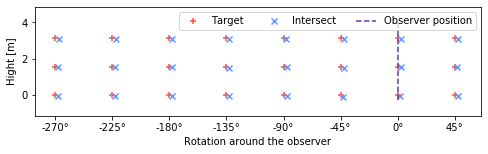

FRC


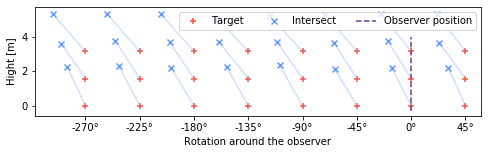

HRC


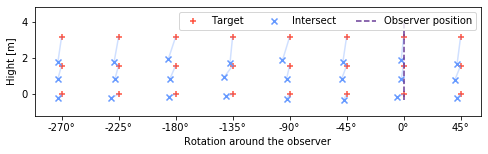

IFRC


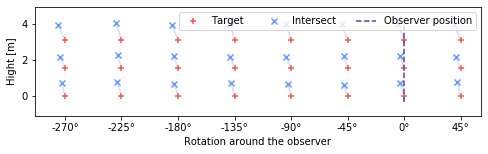

In [36]:
for rc in sorted(raycasts):
    plt.figure(figsize=(8,2))
    print(rc)
        
    dfAgg =df[df.RayCasts == rc].groupby(["TargetId", "PId"]).mean().groupby(["TargetId"]).median()
    dfAgg = dfAgg.reset_index()
    
    plt.scatter(dfAgg.TargetProjectionX, dfAgg.TargetProjectionY, marker="+", color=colorDic["red"], label="Target")
    plt.scatter(dfAgg["XCorected"], dfAgg["Y"], marker="x", color=colorDic["blue"], label="Intersect")
    ax = plt.gca()
    for i, e in dfAgg.iterrows():
        l = mlines.Line2D([e.TargetProjectionX, e["XCorected"]], [e.TargetProjectionY, e["Y"]], color=colorDic["blue"], alpha=0.3)
        ax.add_line(l)

    plt.vlines((4*np.pi*2) /360 * 90, ymin=-.3, ymax=4, linestyles="--", color=colorDic["purple"], label="Observer position")    
    lstTicks = []
    for x in np.arange(-180-90,181-90,45):
        lstTicks.append(str(x)+"°")
    plt.xticks((4*np.pi*2)/360 * np.arange(-180,181,45), lstTicks)

    plt.ylabel("Hight [m]")
    plt.xlabel("Rotation around the observer")
    plt.legend(ncol=3, loc=1)
    plt.axis('equal')
    plt.savefig('%sS2_Pointer%s.pdf' % (OUTPUT_PATH_F, rc), bbox_inches='tight',transparent=False, pad_inches=0)
    plt.show()

In [37]:
df.groupby(["RayCasts", "PId"]).mean().reset_index().groupby(["RayCasts"])['DistanceError'].describe().round(3)*100.0

,count,mean,std,min,25%,50%,75%,max
RayCasts,,,,,,,,
EFRC,1200.0,33.8,12.2,13.3,24.8,33.9,40.3,57.8
FRC,1200.0,304.1,85.3,184.6,247.5,286.5,356.7,495.7
HRC,1200.0,107.9,21.5,82.0,90.9,96.8,123.8,147.1
IFRC,1200.0,94.7,23.3,52.0,84.3,91.6,112.3,129.2


In [22]:
df.groupby(["RayCasts", "PId"]).mean().reset_index().groupby(["RayCasts"])['DistanceError'].describe().round(3)*100.0

,count,mean,std,min,25%,50%,75%,max
RayCasts,,,,,,,,
EFRC,1200.0,33.8,12.2,13.3,24.8,33.9,40.3,57.8
FRC,1200.0,304.1,85.3,184.6,247.5,286.5,356.7,495.7
HRC,1200.0,107.9,21.5,82.0,90.9,96.8,123.8,147.1
IFRC,1200.0,94.7,23.3,52.0,84.3,91.6,112.3,129.2


In [38]:
lst = ["RayCasts",  "TargetProjectionX", "TargetProjectionY", "PId", 'DistanceError']
df.groupby(["RayCasts", "PId",  "TargetProjectionX", "TargetProjectionY"]).mean().reset_index()[lst].to_csv(OUTPUT_PATH + "R_Distance_Pointer_Targets.csv", index=None)

In [39]:
lst = ["RayCasts", "PId", 'DistanceError']
df.groupby(["RayCasts", "PId"]).mean().reset_index()[lst].to_csv(OUTPUT_PATH + "R_Distance_Pointer.csv", index=None)

In [40]:
df.groupby(["RayCasts", "PId", "Correction"]).mean().reset_index().groupby(["RayCasts", 'Correction'])['DistanceError'].describe().round(3)*100.0

count   mean   std    min    25%    50%    75%    max
RayCasts Correction                                                        
EFRC     False       1200.0   32.7  18.4   13.5   19.5   28.2   38.6   65.2
         True        1200.0   34.9  17.2   11.2   26.4   29.8   41.0   78.1
FRC      False       1200.0  297.4  80.8  169.8  250.9  284.1  331.2  494.4
         True        1200.0  310.8  96.8  199.4  244.0  278.5  364.1  497.1
HRC      False       1200.0  110.8  25.7   74.8   88.8  107.5  130.6  148.3
         True        1200.0  104.9  22.9   69.1   91.9  100.4  121.1  150.9
IFRC     False       1200.0   90.7  28.5   18.6   85.9   90.4  108.8  127.1
         True        1200.0   98.8  22.8   67.7   84.6   95.3  112.2  142.4

In [25]:
df.groupby(["RayCasts", "PId", "Correction"]).mean().reset_index().groupby(["RayCasts", 'Correction'])['DistanceError'].describe().round(3)*100.0

count   mean   std    min    25%    50%    75%    max
RayCasts Correction                                                        
EFRC     False       1200.0   32.7  18.4   13.5   19.5   28.2   38.6   65.2
         True        1200.0   34.9  17.2   11.2   26.4   29.8   41.0   78.1
FRC      False       1200.0  297.4  80.8  169.8  250.9  284.1  331.2  494.4
         True        1200.0  310.8  96.8  199.4  244.0  278.5  364.1  497.1
HRC      False       1200.0  110.8  25.7   74.8   88.8  107.5  130.6  148.3
         True        1200.0  104.9  22.9   69.1   91.9  100.4  121.1  150.9
IFRC     False       1200.0   90.7  28.5   18.6   85.9   90.4  108.8  127.1
         True        1200.0   98.8  22.8   67.7   84.6   95.3  112.2  142.4

In [41]:
df.groupby(["RayCasts", "PId", "Correction"]).mean().reset_index()[['RayCasts', 'PId', 'Correction', 'DistanceError']].to_csv(OUTPUT_PATH + "R_Distance_Pointer_Corr.csv", index=None)

# Observer

In [42]:
dfObserver = dfMatch[dfMatch.IsPointer == False]

### IGNORE APPLES####
dfObserver = dfObserver[dfObserver.Scene == 'Cylinder']

dfObserver["StickAngle"] = dfObserver.IntersectionStick.apply(lambda x: math.degrees(math.atan2(x[0],x[2])))
dfObserver["StickX"]  = (dfObserver.StickAngle / 180.0) * np.pi * 4.0
dfObserver["StickY"]  = dfObserver.IntersectionStick.apply(lambda x: x[1])

dfObserver['StickXCorected'] =dfObserver[["TargetProjectionX", "StickX"]].apply(lambda x:  x.StickX - 4*np.pi*2 if x.StickX - x.TargetProjectionX > 4*np.pi else x.StickX ,axis=1)


dfObserver["ErrorDistance"] = np.sqrt(np.power(dfObserver.StickXCorected - dfObserver.TargetProjectionX, 2) + np.power(dfObserver.StickY - dfObserver.TargetProjectionY, 2))
dfObserver["ErrorDistanceX"] = (dfObserver.StickXCorected - dfObserver.TargetProjectionX).abs()
dfObserver["ErrorDistanceY"] = (dfObserver.StickY - dfObserver.TargetProjectionY).abs()

In [43]:
dfX = dfObserver[['Correction', 'PId', 'ObserverDistance', 'TargetId', 'ErrorDistance']]

dfX = dfX.groupby(['Correction', 'PId', 'ObserverDistance']).mean().reset_index()


#./out/AnovaData.csv"
dfX.to_csv("./out/R_Distance_Observer.csv", sep=",", index=False)

(dfX.groupby(['Correction', 'ObserverDistance']).ErrorDistance.describe()*100).round(1)

count   mean   std   min   25%    50%    75%  \
Correction ObserverDistance                                                  
False      0.46              1200.0   89.4  32.4  54.0  61.7   79.3  110.0   
           0.83              1200.0  102.4  36.3  54.3  67.9  104.5  133.1   
           1.20              1200.0  112.2  48.2  67.6  74.1  110.8  126.7   
True       0.46              1200.0   70.0  27.0  42.7  49.3   61.3   80.2   
           0.83              1200.0   84.3  27.1  56.8  63.1   73.8  109.1   
           1.20              1200.0   80.2  30.9  51.4  63.0   68.8   92.0   

                               max  
Correction ObserverDistance         
False      0.46              160.0  
           0.83              159.1  
           1.20              239.6  
True       0.46              133.0  
           0.83              138.9  
           1.20              159.0

In [44]:
(dfX.groupby(['Correction']).ErrorDistance.describe()*100).round(1)

,count,mean,std,min,25%,50%,75%,max
Correction,,,,,,,,
False,3600.0,101.4,39.6,54.0,69.8,94.3,124.4,239.6
True,3600.0,78.2,28.2,42.7,59.4,69.7,92.0,159.0


In [45]:
1-(dfX.groupby(['Correction']).ErrorDistance.describe()['mean'][1] / dfX.groupby(['Correction']).ErrorDistance.describe()['mean'][0])

0.22860022003297553

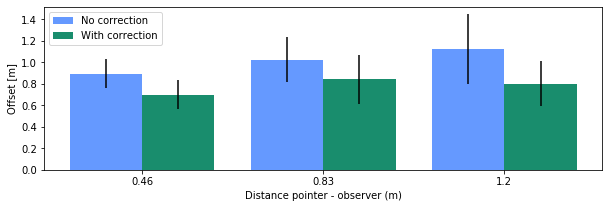

In [46]:
dfX = dfObserver
fig, ax = plt.subplots(figsize=(10, 3))
lenP = len(dfX.PId.unique())
MeanNoCorrection = dfX[dfX.Correction == False].groupby(['PId', 'ObserverDistance']).mean().reset_index().groupby('ObserverDistance').ErrorDistance.mean().values
StdNoCorrection= dfX[dfX.Correction == False].groupby(['PId', 'ObserverDistance']).ErrorDistance.std().reset_index().groupby('ObserverDistance').ErrorDistance.mean().values / np.sqrt(12)
MeanCorrection = dfX[dfX.Correction == True].groupby(['PId', 'ObserverDistance']).mean().reset_index().groupby('ObserverDistance').ErrorDistance.mean().values
StdCorrection= dfX[dfX.Correction == True].groupby(['PId', 'ObserverDistance']).ErrorDistance.std().reset_index().groupby('ObserverDistance').ErrorDistance.mean().values / np.sqrt(12)

plt.bar(np.arange(0.8, 3, 1), MeanNoCorrection, width=0.4, color=colorDic["blue"], label="No correction", yerr = StdNoCorrection)
plt.bar(np.arange(1.2, 4, 1), MeanCorrection, width=0.4, color=colorDic["green"], label="With correction", yerr = StdCorrection)

plt.xticks(np.arange(1, 4, 1), sorted(dfX.ObserverDistance.unique()))
plt.ylabel("Offset [m]")
plt.xlabel("Distance pointer - observer (m)")
plt.legend(loc=2)
plt.savefig('%s/S2_Distance.pdf' % OUTPUT_PATH_F, bbox_inches='tight',transparent=False, pad_inches=0)
plt.show()

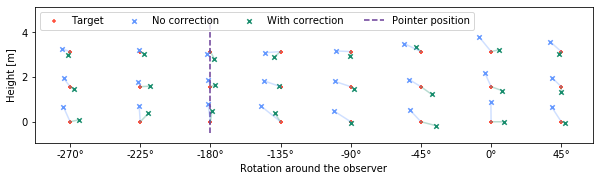

In [55]:
dfAgg = dfObserver.groupby(["TargetId", 'Correction'])[["StickXCorected", "StickY", "TargetProjectionX", "TargetProjectionY"]].median()
dfAgg = dfAgg.reset_index()
v
plt.scatter(dfObserver.TargetProjectionX, dfObserver.TargetProjectionY, marker="+", s=20, color=colorDic["red"], label="Target")
#for dis in sorted(dfAgg.ObserverDistance.unique()):
for corr in sorted(dfAgg.Correction.unique()):
    df = dfAgg[(dfAgg.Correction == corr)]

    #s = ""
    #if (dis == 0.46):
    #    s = s + "46cm"
    #    c = colorDic["blue"]
    #elif (dis == 0.83):
    #    s = s + "83cm"
    #    c = colorDic["yellow"]
    #elif (dis ==  1.2):
    #    s = s + "120cm"
    #    c = colorDic["green"]
        
    if (corr):
        c = colorDic["green"]
        s = "With correction"
    else:
        c = colorDic["blue"]
        s = "No correction"

    plt.scatter(df.StickXCorected, df.StickY, marker="x", s=20, color=c, label=s)

    #av = dfMatch[['TargetProjectionX', 'StickX', 'TargetProjectionY', 'StickY']].values
    ax = plt.gca()
    for i, e in df.iterrows():
        l = mlines.Line2D([e.TargetProjectionX, e.StickXCorected], [e.TargetProjectionY, e.StickY], color=c, alpha=0.3)
        ax.add_line(l)

plt.vlines((4*np.pi*2) /360 * -90, ymin=-.5, ymax=4.7, linestyles="--", color=colorDic["purple"], label="Pointer position")
plt.ylim(-3,5)

lstTicks = []
for x in np.arange(-180-90,181-90,45):
    lstTicks.append(str(x)+"°")
plt.xticks((4*np.pi*2)/360 * np.arange(-180,181,45), lstTicks)

plt.ylabel("Height [m]")
plt.xlabel("Rotation around the observer")
plt.legend(ncol=5, loc=2)
plt.axis('equal')


plt.savefig('%sS2_Observer.pdf' % (OUTPUT_PATH_F), bbox_inches='tight',transparent=False, pad_inches=0)
plt.show()

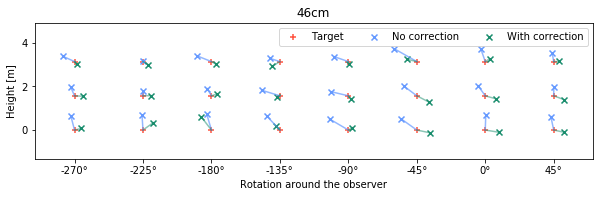

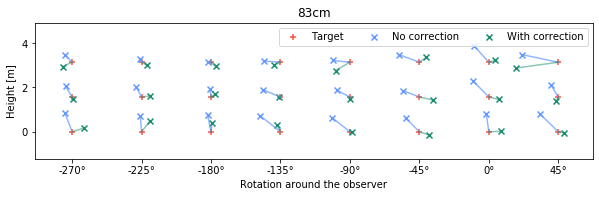

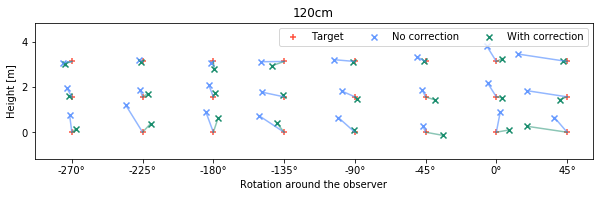

In [57]:
dfAgg = dfObserver.groupby(["ObserverDistance", "TargetId", "Correction"])[["StickXCorected", "StickY", "TargetProjectionX", "TargetProjectionY"]].mean()
dfAgg = dfAgg.reset_index()


for dis in sorted(dfAgg.ObserverDistance.unique()):
    cf = dfAgg[(dfAgg["Correction"] == True) & (dfAgg.ObserverDistance == dis)]
    nf = dfAgg[(dfAgg["Correction"] == False) & (dfAgg.ObserverDistance == dis)]
    
    plt.figure(figsize=(10,2.5))
    plt.title("%icm" % (dis*100))
    
    plt.scatter(nf.TargetProjectionX, nf.TargetProjectionY, marker="+", color=colorDic["red"], label="Target")
    plt.scatter(nf.StickXCorected, nf.StickY, marker="x", color=colorDic["blue"], label="No correction")
    plt.scatter(cf.StickXCorected, cf.StickY, marker="x", color=colorDic["green"], label="With correction")

    ax = plt.gca()
    for i, e in nf.iterrows():
        l = mlines.Line2D([e.TargetProjectionX, e.StickXCorected], [e.TargetProjectionY, e.StickY], alpha=0.7)
        l.set_color(colorDic["blue"])
        ax.add_line(l)
    for i, e in cf.iterrows():
        l = mlines.Line2D([e.TargetProjectionX, e.StickXCorected], [e.TargetProjectionY, e.StickY], alpha=0.5)
        l.set_color(colorDic["green"])
        ax.add_line(l)
        
    lstTicks = []
    for x in np.arange(-180-90,181-90,45):
        lstTicks.append(str(x)+"°")
        
    plt.ylabel("Height [m]")
    plt.xlabel("Rotation around the observer")
    
    plt.xticks((4*np.pi*2)/360 * np.arange(-180,181,45),lstTicks)
    plt.axis('equal')
    
    plt.legend(ncol=3, loc=1)
    plt.show()